# TIMESERIES ANOMALY DETECTION
## AUTHOR: ANTE DUJIC
<hr style="border:2px solid gray"> </hr>

<center><img src="https://i0.wp.com/thedatascientist.com/wp-content/uploads/2019/02/anomaly_detection.png?fit=1200%2C800&ssl=1" width="400"/></center>

<hr style="border:2px solid gray"> </hr>

## INTRODUCTION
***

The aim of this notebook is to break down and explain in details the code from [Keras documentation](https://keras.io/examples/timeseries/timeseries_anomaly_detection/) on Timeseries anomaly detection using an Autoencoder.

#### KERAS

Keras is deep learning API developed by Google for implementing neural networks. [3] It makes the implementation of the neural networks easier.

> *Keras is: [2]*
> - *Simple -- but not simplistic. Keras reduces developer cognitive load to free you to focus on the parts of the problem that really matter.*
> - *Flexible -- Keras adopts the principle of progressive disclosure of complexity: simple workflows should be quick and easy, while arbitrarily advanced workflows should be possible via a clear path that builds upon what you've already learned.*
> - *Powerful -- Keras provides industry-strength performance and scalability: it is used by organizations and companies including NASA, YouTube, or Waymo.*

Keras is written in Python and it is running on top of the machine learning platform Tenserflow. Tenserflow is an open-source software library for machine learning and artificial intelligence developed by Google Brain Team. [4] 

The core data structures of Keras are layers and models. The simplest type of model is the Sequential model, a linear stack of layers. [2] This model will be used for the anomaly detection.

#### AUTOENCODER

An autoencoder is a type of artificial neural network where the input is the same as the output. It works by compressing the input into a lower-dimensional code using encoder and then reconstructing the output from this lower-dimensional representation using decoder. [5]

#### ANOMALY DETECTION

Anomaly detection involves identifying the differences, deviations, and exceptions from the norm in a dataset. It’s sometimes referred to as outlier detection (i.e., looking at a dataset to identify any outlying or unusual datapoints, data groups, or activity).[1]

##### TIMESERIES?


***

In [1]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## DATA
***

The data used is [Numenta Anomaly Benchmark(NAB)](https://www.kaggle.com/datasets/boltzmannbrain/nab) dataset. NAB provide a controlled and repeatable environment of open-source tools for evaluating real-time anomaly detection algorithms on streaming data. [6] It is comprised of over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real-time applications. [7] Majority of data is real-world. Data used for the anomaly detection can be found in the [GitHub](https://github.com/numenta/NAB/tree/master/data) repository, in the *data* folder. This data is artificially generated. The simplicity of this dataset allows the effective demonstration of anomaly detection.

```
NAB 
│
└───data
│   │
│   └───artificialNoAnomaly
│   │    │   art_daily_small_noise.csv
│   │    │   ...
│   │
│   └───artificialWithAnomaly
│   │    │   art_daily_jumpsup.csv
│   │    │   ...
│   │
│   └─── ...
│
└─── ...
```

In [2]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [3]:
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [4]:
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

#### TIMESERIES DATA WITHOUT ANOMALIES
***

As the name of this dataset suggests, it is artificially-generated data without any anomalies. This dataset will be used for training. We'll have a look at this dataset below.

In [5]:
# Read data into a dataframe, setting "timestamp" as the index column
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [6]:
# First 5 records of the dataset
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


Looking at the output above, and comparing the values from the direct url, we see that the values get rounded.
- $ 18.324918539200002 \Rightarrow 18.324919 $
- $ 21.970327182 \Rightarrow 21.970327 $

We can extract the data, to confirm the rounding.

In [7]:
# Double check the first value, to see if and how the value was round.
df_small_noise.iloc[0]['value']

18.3249185392

In [8]:
# Double check the first value, to see if and how the value was round.
df_small_noise.iloc[1]['value']

21.970327182

The rounding from in the *head* output is only visual, but we see that some values still get rounded to a certain degree.
- $ 18.324918539200002 \Rightarrow 18.3249185392 $
- $ 21.970327182 \Rightarrow 21.970327182 $

This rounding is deemed insignificant.

In [9]:
# Overall summary of the dataset (number of values, mean, std, etc.)
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


We can see there are 4032 records in this dataset. We can also see the mean, standard deviation, the min and max values and the 25th, 50th and 75th percentiles.

Below is the dataset plotted. It gives a better insight to the dataset.

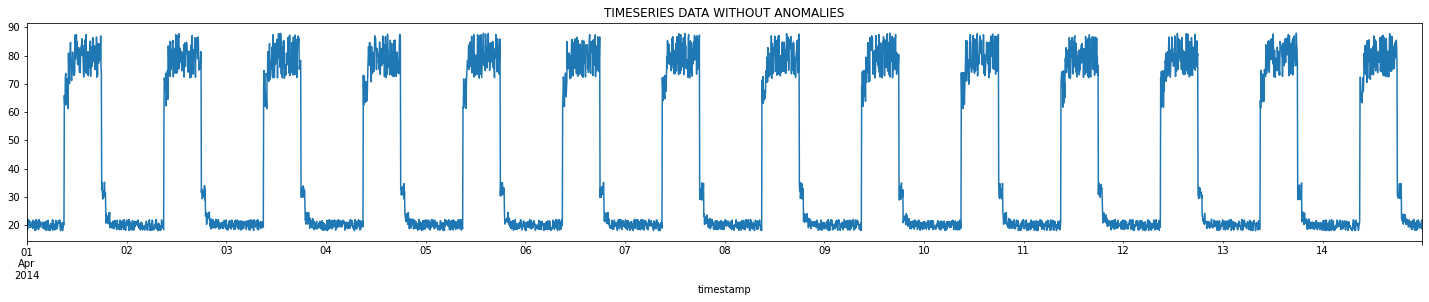

In [10]:
# Plot size.
fig, ax = plt.subplots(figsize=(25,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax)
# Name the plot.
plt.title("TIMESERIES DATA WITHOUT ANOMALIES");

#### TIMESERIES DATA WITH ANOMALIES
***

Same as the above data, the name suggests this dataset is artificially-generated data with anomalies. This will be best visible when data is visualised. This dataset will be used for testing. We'll have a look at this dataset below.

In [11]:
# Read data into a dataframe, setting "timestamp" as the index column
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [12]:
# First 5 recordds of the dataset
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [13]:
# Double check the first value, to see if and how the value was round.
df_daily_jumpsup.iloc[0]['value']

19.761251903

Same as with data without anomalies, this data also gets rounded but insignificantly.

In [14]:
# # Overall summary of the dataset (number of values, mean, std, etc.)
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


There are also 4032 records in this dataset. We can also see the mean, standard deviation, the min and max values and the 25th, 50th and 75th percentiles. Below is the visualisation of the data. It is clearly visible how this dataset contains anomaly.

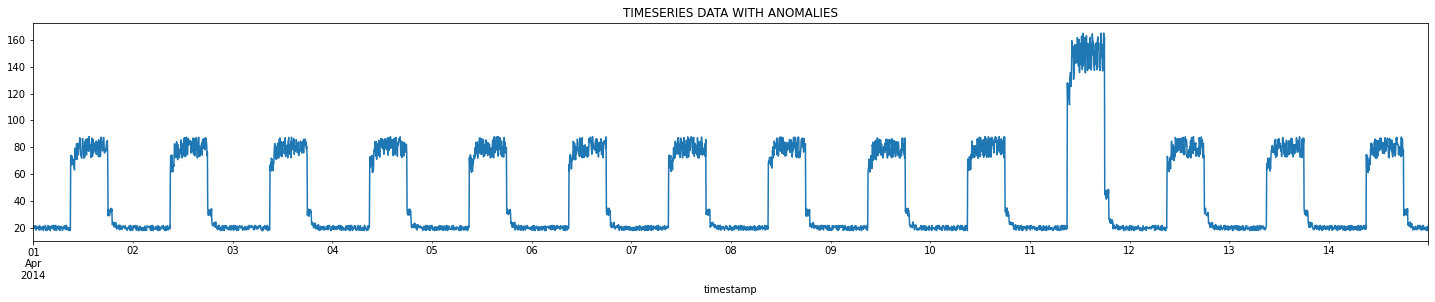

In [15]:
# Plot size
fig, ax = plt.subplots(figsize=(25,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);
plt.title("TIMESERIES DATA WITH ANOMALIES");

#### OVERVIEW

In [16]:
# No anomaly dataset details
no_anomaly = df_small_noise.describe()
# No anomaly dataset details
with_anomaly = df_daily_jumpsup.describe() 
# Combined details
result = pd.concat([no_anomaly, with_anomaly], axis=1, keys=["NO ANOMALY", "WITH ANOMALY"])
result

,NO ANOMALY,WITH ANOMALY
,value,value
count,4032.000000,4032.000000
mean,42.438353,44.494254
std,28.077122,32.432473
min,18.000964,18.001010
25%,19.841390,19.991382
50%,21.608487,21.648503
75%,75.450282,76.435943
max,87.976128,164.947481


### PREPARE TRAINING DATA
***

We can see in the *describe* function outputs, that the range of the two datasets defer. The *No-anomaly* dataset ranges from ~ 18 to ~ 88, while *With anomaly* dataset ranges form ~18 to ~165. Whenever the attributes of the dataset have different ranges, it is recommended to use the normalisation or standardisation. It helps to enhance the performance and reliability of the machine learning model. [8] A good rule of thumb is that input variables should be small values, probably in the range of 0-1 or standardized with a zero mean and a standard deviation of one. [9] To standardize the dataset we'll use the formula below: [10]

###  $$ z = {X - \mu \over \sigma} $$

- z - standardized value
- X - value we calculate the z for
- $\mu$ - mean
- $\sigma$ - standard deviation

In [17]:
# Get training dataset mean
train_mean = df_small_noise.mean()
train_mean[0]

42.438353335806646

In [18]:
# Get training dataset standard deviation
train_std = df_small_noise.std()
train_std[0]

28.077122281262515

The idea is to take the value column and create a new df - Values that are equivalent to the original values, but with the mean of 0 and std of 1. That's done to standardize the effect.

In [19]:
# Calculate standardized value using the above formula
df_train_vals = (df_small_noise - train_mean) / train_std

In [20]:
# # First 5 records of the standardized dataset
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [21]:
# Create a column with the standardized data
df_small_noise['standardized'] = df_train_vals

In [22]:
# Get the mean and std of the standardized data
# The idea was to get the new dataset with mean of 0 and std of 1
df_small_noise['standardized'].mean(), df_small_noise['standardized'].std()

(-2.616541242931684e-15, 1.0000000000000018)

In [23]:
# Round the data to see that we indeed got the wanted mean and std
round(df_small_noise['standardized'].mean()), round(df_small_noise['standardized'].std())

(0, 1)

We can see above that the mean of the standardized dataset is ~ 0, and the standard deviation is ~ 1.

In [24]:
# # First 5 records of original and standardized dataset
df_small_noise.head()

,value,standardized
timestamp,,
2014-04-01 00:00:00,18.324919,-0.858829
2014-04-01 00:05:00,21.970327,-0.728993
2014-04-01 00:10:00,18.624806,-0.848148
2014-04-01 00:15:00,21.953684,-0.729586
2014-04-01 00:20:00,21.909120,-0.731173


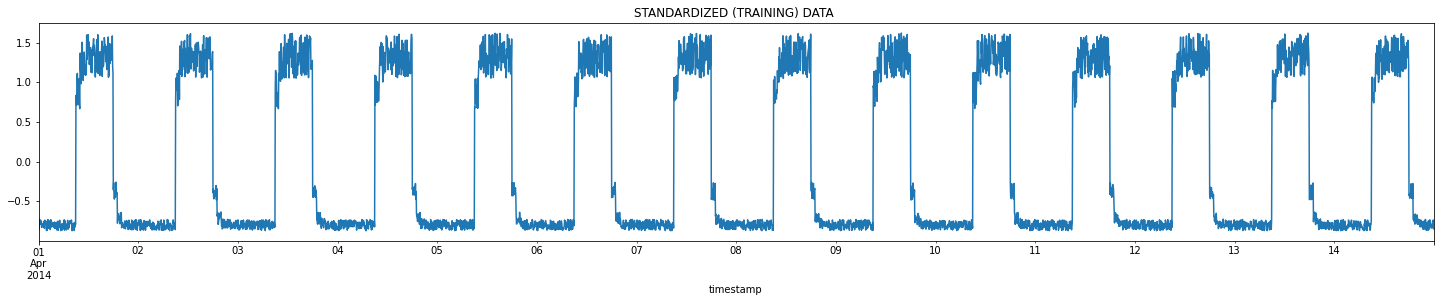

In [25]:
# Plot size
fig, ax = plt.subplots(figsize=(25,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);
plt.title("STANDARDIZED (TRAINING) DATA ");

In [26]:
print("Number of training samples:", len(df_train_vals))

Number of training samples: 4032


##### WINDOW SLIDING

In order to detect anomalous points in time series, a sliding window technique is one of the powerful method due to its applicability for a real-time detection. [11] The sliding window method is useful for reducing the time complexity of certain problems. [12] When used for preprocessing time-series data, it provides an improvement in accuracy, latency, and cost of processing. A sliding window set is a way to restructure a time series dataset as a supervised learning problem. Once restructured, the data works as an input to the artificial intelligence model.

<center><img src="img/window.drawio.svg" width="500"/></center>

In [27]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

12

In [28]:
# Number of windows from L.
len(L) - (win_size - 1)

10

In [29]:
# Remove brackets.
len(L) - win_size + 1

10

In [30]:
# For accumulating the windows.
wins = []
# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

In [31]:
# Create a 2D numpy array from wins.
wins = np.stack(wins)
wins

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [32]:
wins.shape

(10, 3)

We'll apply the above window sliding technique to our training dataset. There is a value for every 5 min for 14 days in the dataset. If we divide the total number of records (4032) with the number of days (14) we get 288 timesteps per day. This is deemed the good size for the window.

In [33]:
# Window size for our training dataset 
window_size = 288

In [34]:
# Number of windows
len(df_train_vals) - window_size + 1

3745

In [35]:
# Function to generate training sequences for use in the model
def create_sequences(values, time_steps=window_size):
    # Empty list
    windows = []
    # Loop through all the possible windows
    for i in range(len(values) - time_steps + 1):
        # Append the window to the list
        windows.append(values[i : (i + time_steps)])
    # Stack the result
    return np.stack(windows)

In [36]:
# Apply the function to the training dataset (create sequences)
x_train = create_sequences(df_train_vals)

In [37]:
# Get the shape of the array
x_train.shape

(3745, 288, 1)

We can see there are 3745 windows, each of size 288.

### BUILD A MODEL

A typical model in Keras is an aggregate of multiple training and inferential layers. [15] Keras Layers are the functional building blocks of Keras Models. Each layer is created using numerous layer_() functions. These layers are fed with input information, they process this information, do some computation and hence produce the output. Further, this output of one layer is fed to another layer as its input. [17] There are two methods to build models in Keras:
1. Functional -  handles non-linear models with diverse functionalities.
2. Sequential - used in a network that has a linear topology.

To build our model we use the Sequential class in Keras allowing us to group a linear stack of layers into the model. Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. Each layer has weights that correspond to the layer that follows it. [13] Generally, all layers in Keras need to know the shape of their inputs in order to be able to create their weights. So when you create a layer like this, initially, it has no weights. It creates its weights the first time it is called on an input, since the shape of the weights depends on the shape of the inputs. This also applies to Sequential models. In general, it's a recommended best practice to always specify the input shape of a Sequential model in advance if you know what it is. This can be done by passing an Input object to your model, so that it knows its input shape from the start. The input object is not a layer. [16]

In [67]:
# Input shape
x_train.shape[1], x_train.shape[2]

(288, 1)

In [68]:
# Create sequential model (layers will be added to this below)
model = keras.Sequential()

In [65]:
# Pass the input object  https://keras.io/api/layers/core_layers/input/
model.add(keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])))

There is a variaty of layers available to choose from in [Keras](https://keras.io/api/layers/), each with specific task. It is also possible to create own layers. There are no rules about which layers have to be used for a certain task, or how many. It is up to the user to research, experiment or copy the other existing work. Layers used for this anomaly detection are two of the convolutional type (Conv1D, Conv1DTranspose) and the Dropout. They are added to the model and briefly explained below.

In [42]:
# https://keras.io/api/layers/convolution_layers/convolution1d/
model.add(keras.layers.Conv1D(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"))

The main purpose of dropout layer is to remove the noise that may be present in the input of neurons. This consequently prevents over-fitting of model.
DIAGRAM

In [43]:
# https://keras.io/api/layers/regularization_layers/dropout/
model.add(keras.layers.Dropout(rate=0.2))

In [44]:
#
model.add(keras.layers.Conv1D(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"))

In [71]:
# https://keras.io/api/layers/convolution_layers/convolution1d_transpose/
model.add(keras.layers.Conv1DTranspose(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"))

In [46]:
# 
model.add(keras.layers.Dropout(rate=0.2))

In [47]:
#
model.add(keras.layers.Conv1DTranspose(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"))

In [48]:
#
model.add(keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"))

- https://machinelearningmastery.com/three-ways-to-build-machine-learning-models-in-keras/
- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
- https://medium.com/@subhamoy.paul986/keras-sequential-api-72e45c39259b
- https://www.kdnuggets.com/2018/06/basic-keras-neural-network-sequential-model.html
- https://techvidvan.com/tutorials/keras-layers/
- https://machinelearningknowledge.ai/different-types-of-keras-layers-explained-for-beginners/

In [49]:
# Looking at the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [50]:
# 
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [51]:
# Compiling the model (final step)
model.compile(optimizer=optimizer, loss="mse")

### TRAIN THE MODEL

In [53]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 61ms/step - loss: 0.5358 - val_loss: 0.2505
Epoch 2/50
27/27 [==============================] - 2s 57ms/step - loss: 0.1124 - val_loss: 0.0533
Epoch 3/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0633 - val_loss: 0.0365
Epoch 4/50
27/27 [==============================] - 2s 59ms/step - loss: 0.0502 - val_loss: 0.0310
Epoch 5/50
27/27 [==============================] - 2s 69ms/step - loss: 0.0421 - val_loss: 0.0281
Epoch 6/50
27/27 [==============================] - 2s 69ms/step - loss: 0.0366 - val_loss: 0.0274
Epoch 7/50
27/27 [==============================] - 2s 67ms/step - loss: 0.0325 - val_loss: 0.0258
Epoch 8/50
27/27 [==============================] - 2s 62ms/step - loss: 0.0297 - val_loss: 0.0243
Epoch 9/50
27/27 [==============================] - 2s 59ms/step - loss: 0.0274 - val_loss: 0.0251
Epoch 10/50
27/27 [==============================] - 2s 62ms/step - loss: 0.0255 - val_loss: 0.0240
Epoch 11/

In [54]:
history.history["loss"]

[0.535790205001831,
 0.11235719919204712,
 0.0632721409201622,
 0.050163209438323975,
 0.04210392385721207,
 0.03664218261837959,
 0.032502565532922745,
 0.029676256701350212,
 0.027445891872048378,
 0.02549883723258972,
 0.02392885833978653,
 0.02275167405605316,
 0.02165241166949272,
 0.02072133868932724,
 0.019864700734615326,
 0.019123824313282967,
 0.018416017293930054,
 0.01769266277551651]

In [55]:
history.history["val_loss"]

[0.2505412995815277,
 0.053333453834056854,
 0.0365169458091259,
 0.030979780480265617,
 0.028100749477744102,
 0.027411101385951042,
 0.025800960138440132,
 0.024325383827090263,
 0.025083675980567932,
 0.024000082165002823,
 0.024108536541461945,
 0.026522934436798096,
 0.023613590747117996,
 0.026786722242832184,
 0.02674102783203125,
 0.025065952911973,
 0.02584453672170639,
 0.02586730197072029]

explain history object

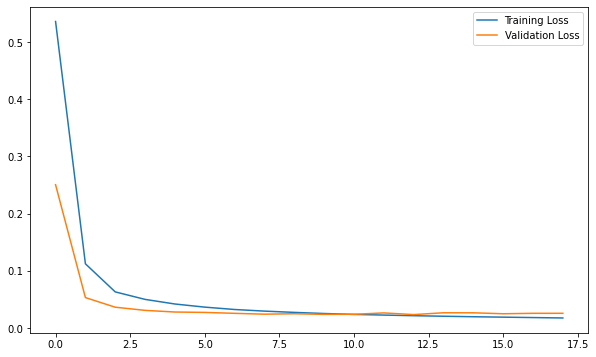

In [56]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

### ANOMALY DETECTION

In [57]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

118/118 [==============================] - 1s 6ms/step


In [58]:
# Calculate loss...
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

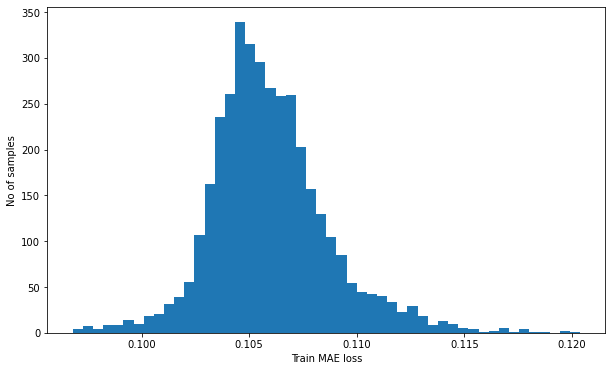

In [59]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.hist(train_mae_loss, bins=50)
# 
ax.set_xlabel("Train MAE loss")
#
ax.set_ylabel("No of samples");

In [60]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
# 
print("Reconstruction error threshold: ", threshold)

Reconstruction error threshold:  0.12036912802235965


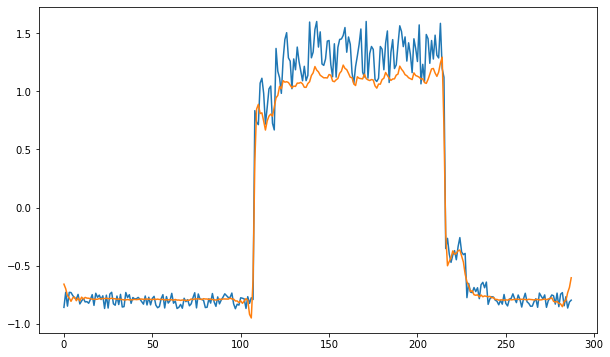

In [61]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
ax.plot(x_train[0])

# 
ax.plot(x_train_pred[0]);

In [62]:
# 
df_test_value = (df_daily_jumpsup - train_mean) / train_std

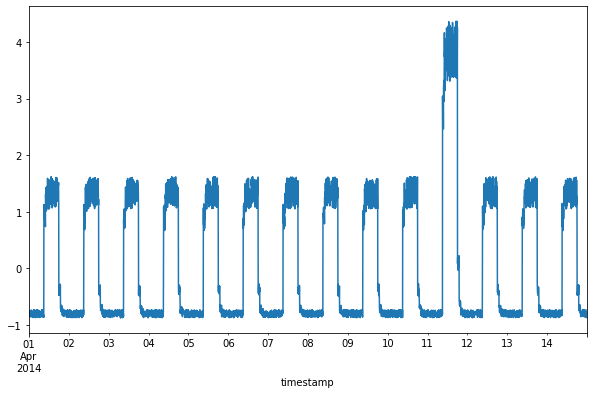

In [63]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_test_value.plot(legend=False, ax=ax);

In [70]:
# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

Test input shape:  (3745, 288, 1)


In [ ]:
# 
x_test_pred = model.predict(x_test)

In [ ]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

In [ ]:
# 
test_mae_loss = test_mae_loss.reshape((-1))
test_mae_loss

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples");

In [ ]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

In [ ]:
print("Number of anomaly samples: ", np.sum(anomalies))

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [ ]:
# 
df_subset = df_daily_jumpsup.iloc[inds]

In [ ]:
#
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r");

### REFERENCES

1. https://thedatascientist.com/anomaly-detection-why-you-need-it/
2. https://keras.io/about/
3. https://www.simplilearn.com/tutorials/deep-learning-tutorial/what-is-keras
4. https://en.wikipedia.org/wiki/TensorFlow
5. https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798
6. https://www.kaggle.com/datasets/boltzmannbrain/nab
7. https://paperswithcode.com/dataset/nab
8. https://www.javatpoint.com/normalization-in-machine-learning
9. https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
10. https://www.statisticshowto.com/standardized-values-examples/
11. https://www.researchgate.net/publication/353001246_Anomaly_Detection_Using_a_Sliding_Window_Technique_and_Data_Imputation_with_Machine_Learning_for_Hydrological_Time_Series
12. https://programmathically.com/what-is-the-sliding-window-algorithm/
13. https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37
14. https://github.com/knathanieltucker/a-bit-of-deep-learning-and-keras/blob/master/notebooks/Sequential.ipynb
15. https://www.geeksforgeeks.org/how-to-create-models-in-keras/
16. https://keras.io/guides/sequential_model/
17. https://techvidvan.com/tutorials/keras-layers/

https://towardsdatascience.com/fraud-and-anomaly-detection-with-artificial-neural-networks-using-python3-and-tensorflow-44b73d8b1240